In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import itertools
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
import os

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Getting Data from CSV Files

In [2]:
## importing team data and assigning each team to a unique variable

Kansas_City = pd.read_csv(r'.\data\Kansas CityKC.csv')
New_England = pd.read_csv(r'.\data\New EnglandNE.csv')
Arizona = pd.read_csv(r'.\data\ArizonaAri.csv')
Detroit = pd.read_csv(r'.\data\DetroitDet.csv')
Atlanta = pd.read_csv(r'.\data\AtlantaAtl.csv')
Chicago = pd.read_csv(r'.\data\ChicagoChi.csv')
Baltimore = pd.read_csv(r'.\data\BaltimoreBal.csv')
Cincinnati = pd.read_csv(r'.\data\CincinnatiCin.csv')
NY_Jets = pd.read_csv(r'.\data\NY JetsNYJ.csv')
Buffalo = pd.read_csv(r'.\data\BuffaloBuf.csv')
Carolina = pd.read_csv(r'.\data\CarolinaCar.csv')
San_Francisco = pd.read_csv(r'.\data\San FranciscoSF.csv')
Pittsburgh = pd.read_csv(r'.\data\PittsburghPit.csv')
Cleveland = pd.read_csv(r'.\data\ClevelandCle.csv')
NY_Giants = pd.read_csv(r'.\data\NY GiantsNYG.csv')
Dallas = pd.read_csv(r'.\data\DallasDal.csv')
Seattle = pd.read_csv(r'.\data\SeattleSea.csv')
Green_Bay = pd.read_csv(r'.\data\Green BayGB.csv')
Jacksonville = pd.read_csv(r'.\data\JacksonvilleJax.csv')
Houston = pd.read_csv(r'.\data\HoustonHou.csv')
Indianapolis = pd.read_csv(r'.\data\IndianapolisInd.csv')
LA_Rams = pd.read_csv(r'.\data\LA RamsLA.csv')
Tampa_Bay = pd.read_csv(r'.\data\Tampa BayTB.csv')
Miami = pd.read_csv(r'.\data\MiamiMia.csv')
Oakland = pd.read_csv(r'.\data\OaklandOak.csv')
Tennessee = pd.read_csv(r'.\data\TennesseeTen.csv')
LA_Chargers = pd.read_csv(r'.\data\LA ChargersLAC.csv')
Denver = pd.read_csv(r'.\data\DenverDen.csv')
New_Orleans = pd.read_csv(r'.\data\New OrleansNO.csv')
Minnesota = pd.read_csv(r'.\data\MinnesotaMin.csv')
Philadelphia = pd.read_csv(r'.\data\PhiladelphiaPhi.csv')
Washington = pd.read_csv(r'.\data\WashingtonWas.csv')

In [3]:
list_of_teams = [Kansas_City, New_England, Arizona, Detroit, Atlanta, Chicago, Baltimore, Cincinnati, 
                 NY_Jets, Buffalo, Carolina, San_Francisco, Pittsburgh, Cleveland, NY_Giants, Dallas, 
                 Seattle, Green_Bay, Jacksonville, Houston, Indianapolis, LA_Rams, Tampa_Bay, Miami, 
                 Oakland, Tennessee, LA_Chargers, Denver, New_Orleans, Minnesota, Philadelphia, Washington]

In [4]:
## importing df for all game data

all_games_df = pd.read_csv('.\data\Games.csv')

In [5]:
## removing games that resulted in ties because they happen so rarely and dropped unneeded index column from csv

all_games_df = all_games_df[all_games_df['Outcome'] != 0.5]
all_games_df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [6]:
all_games_df

,V_First downs,V_Total Net Yards,V_Net Yards Rushing,V_Rushing Plays,V_Avg. Yds/Rush,V_Net Yards Passing,V_Gross Yards Passing,V_Avg. Yds/Att Passing,V_Sacked,V_Total Plays,...,H_Avg. Yds/Att Passing,H_Sacked,H_Total Plays,H_Average Gain,H_Interceptions,H_Fumbles Lost,H_Penalty Avg. Yds Lost,H_Third Down Pct,H_Fourth Down Pct,Outcome
0,26,537,185,27,6.9,352,368,10.5,3,65,...,7.4,3,74,5.0,0,0,9.166667,0.33,0.00,0.0
1,24,308,45,18,2.5,263,268,5.6,1,67,...,7.1,1,69,5.3,3,0,10.000000,0.50,0.00,1.0
2,18,372,64,23,2.8,308,321,10.7,2,55,...,5.3,4,63,4.8,0,0,10.000000,0.38,0.50,0.0
3,17,268,157,42,3.7,111,121,7.1,1,60,...,5.5,5,58,3.8,1,1,7.333333,0.30,0.00,0.0
4,11,214,38,15,2.5,176,187,4.8,1,55,...,8.0,2,72,5.7,2,0,8.333333,0.47,0.00,1.0
5,20,287,116,38,3.1,171,171,6.8,0,63,...,5.5,4,54,4.0,1,1,7.400000,0.18,0.25,0.0
6,16,290,35,17,2.1,255,263,7.3,1,54,...,7.4,7,62,3.8,1,0,15.250000,0.25,1.00,0.0
7,13,233,35,12,2.9,198,220,5.8,3,53,...,6.9,1,71,5.5,1,0,10.000000,0.53,0.00,1.0
8,12,225,90,18,5.0,135,158,5.9,3,48,...,7.4,4,74,5.0,0,0,8.750000,0.56,0.00,1.0
9,19,280,155,39,4.0,125,125,6.0,0,60,...,4.6,10,69,2.9,0,3,10.444444,0.41,0.00,0.0


# Data Analysis

In [7]:
## seeing if being home has a significant effect on wins

all_games_df['Outcome'].value_counts(normalize=True)

1.0    0.562092
0.0    0.437908
Name: Outcome, dtype: float64

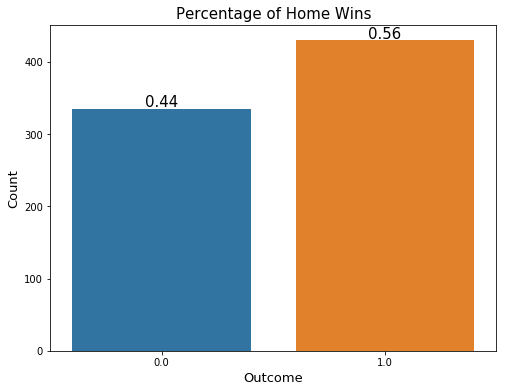

In [116]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=all_games_df['Outcome'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(y)),
            ha="center",
            fontsize=15) 
plt.title('Percentage of Home Wins', fontsize=15)
plt.xlabel('Outcome', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

Looks like playing at home is slightly favorable to teams, teams win at home 56% of the time.

In [8]:
## dropping unneeded index column from csv

for teams in list_of_teams:
    teams.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [9]:
## checking to see if column dropped properly

Tampa_Bay

,First downs,Total Net Yards,Net Yards Rushing,Rushing Plays,Avg. Yds/Rush,Net Yards Passing,Gross Yards Passing,Avg. Yds/Att Passing,Sacked,Total Plays,Average Gain,Interceptions,Fumbles Lost,Penalty Avg. Yds Lost,Third Down Pct,Fourth Down Pct,Outcome,Home,Week
0,22,311,117,34,3.4,194,204,6.6,2,67,4.6,2,1,8.500000,0.53,0.00,1,1,2
1,20,342,26,9,2.9,316,328,8.2,2,51,6.7,0,0,5.285714,0.16,0.00,0,0,3
2,20,434,111,23,4.8,323,332,8.7,1,62,7.0,0,0,4.750000,0.27,0.00,1,1,4
3,26,409,90,20,4.5,319,334,7.3,2,68,6.0,1,0,7.777778,0.30,0.00,0,1,5
4,21,414,70,20,3.5,344,351,8.4,2,64,6.5,1,0,5.444444,0.50,0.66,0,0,6
5,27,447,69,25,2.8,378,384,8.7,1,70,6.4,0,2,11.000000,0.54,0.00,0,0,7
6,16,279,85,22,3.9,194,210,5.5,3,63,4.4,1,1,9.166667,0.16,0.00,0,1,8
7,14,200,87,25,3.5,113,135,4.8,4,57,3.5,0,1,7.142857,0.30,0.00,0,0,9
8,17,271,90,31,2.9,181,187,5.5,1,66,4.1,1,0,8.333333,0.43,0.00,1,1,10
9,19,321,53,24,2.2,268,275,7.4,1,62,5.2,3,0,9.111111,0.23,0.00,1,0,11


In [11]:
## making a correlation map to see if there are any variables that are highly correlated to outcome

corrmat = all_games_df.corr()
top_corr_features = corrmat.index

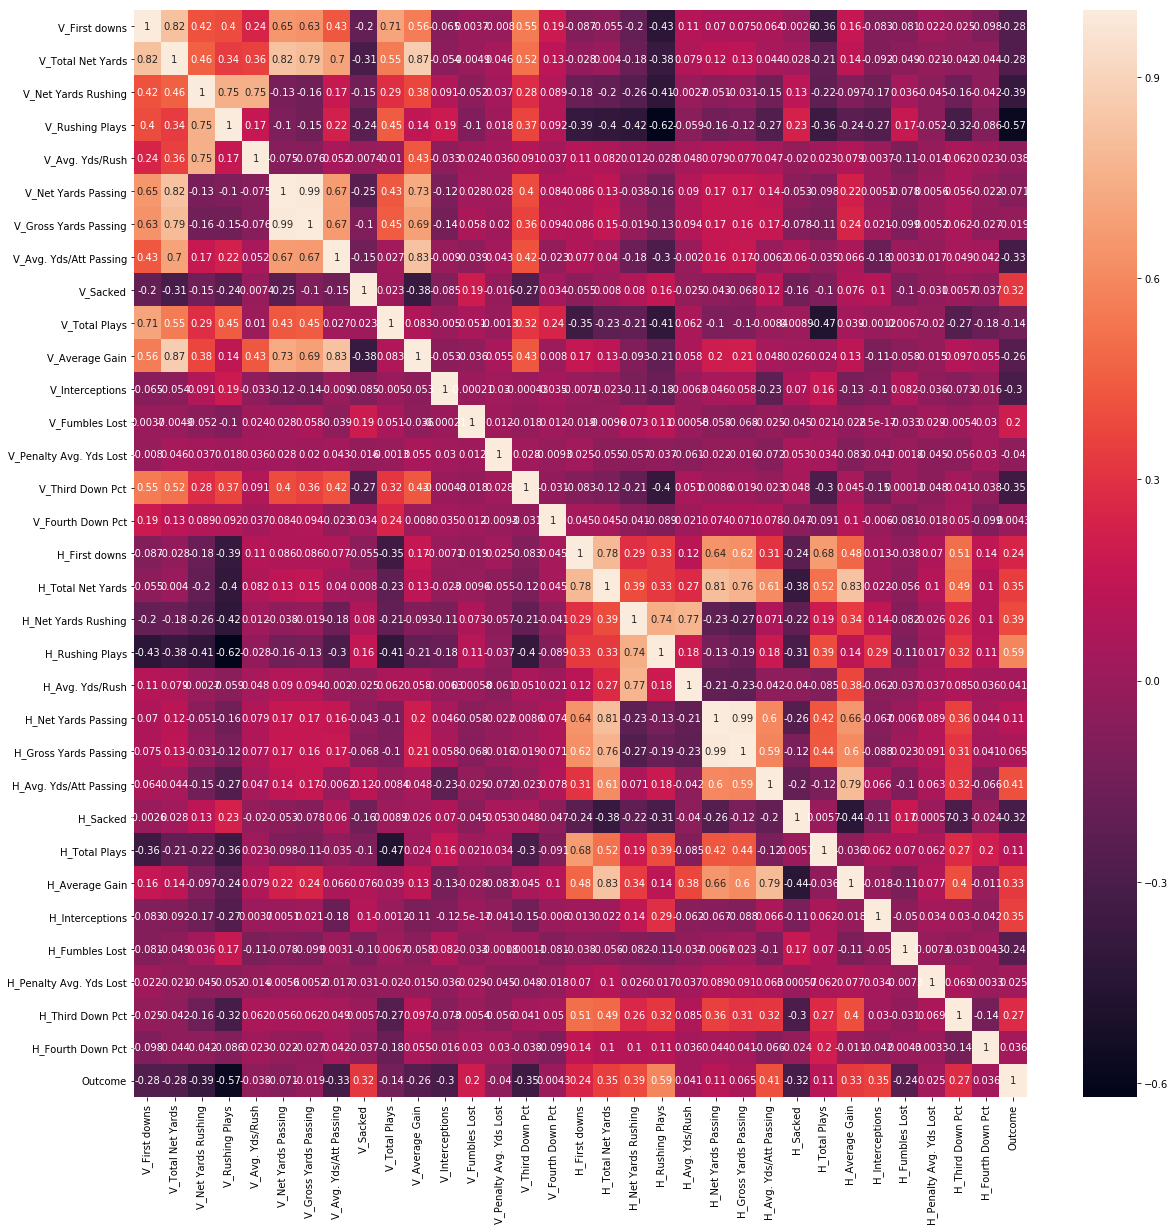

In [12]:
plt.figure(figsize=(20, 20))
heat_map = sns.heatmap(all_games_df[top_corr_features].corr(), annot=True)

Looks like all of the variables are not highly correlated to outcome, so I don't need to drop any of them. The variables with the highest correlation to outcome are Home Rushing Plays and Visitor Rushing Plays. Just based on this info it seems like the more times a team rushes, the more likely they are to win the game.

Because outcome is whether or not the home team wins, visitor columns are negatively correlated to outcome while home columns are positively correlated.

# Running the Data through Models

In [13]:
## separate the target variable from dataset

X = all_games_df.drop(labels=['Outcome'], axis=1)
y = all_games_df['Outcome']

In [14]:
## performance with models improved by scaling data

ss = StandardScaler()
scaled_df = ss.fit_transform(X)

In [15]:
## separating data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.25, random_state=42)

# Logistic Regression

In [84]:
## using gridsearch to find the best parameters for logistic regression model

logreg = LogisticRegression(fit_intercept=False, solver='liblinear', random_state=27)

logistic_grid = [{'C': [1, 50, 2000, 1e15],
                  'penalty': ['l1', 'l2']}]

logistic_gridsearch = GridSearchCV(estimator=logreg,
                                   param_grid=logistic_grid,
                                   scoring='accuracy',
                                   cv=5)

In [85]:
logistic_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=27, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 50, 2000, 1000000000000000.0], 'penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [86]:
logistic_gridsearch.best_params_

{'C': 1, 'penalty': 'l1'}

In [87]:
## calculate evaluation metrics for model: precision, recall, accuracy, f1

y_hat_train = logistic_gridsearch.predict(X_train)
y_hat_test = logistic_gridsearch.predict(X_test)

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.9503311258278145
Testing Precision:  0.9134615384615384

Training Recall:  0.8858024691358025
Testing Recall:  0.8962264150943396

Training Accuracy:  0.9092495636998255
Testing Accuracy:  0.8958333333333334

Training F1-Score:  0.9169329073482428
Testing F1-Score:  0.9047619047619048


In [88]:
## checking metrics for logistic regression

pred = logistic_gridsearch.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[77  9]
 [11 95]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89        86
         1.0       0.91      0.90      0.90       106

   micro avg       0.90      0.90      0.90       192
   macro avg       0.89      0.90      0.89       192
weighted avg       0.90      0.90      0.90       192



Logistic regression works extremely well in predicting outcome of games with the game data I am using with an accuracy score of 90%. The model is also not overfitting to training data with both training and testing metrics very similar to each other. Aiming for a high f1 score with all models because I want to be confident in the model's predictions whenever it predicts a win for the home team.

AUC: 0.9709302325581395


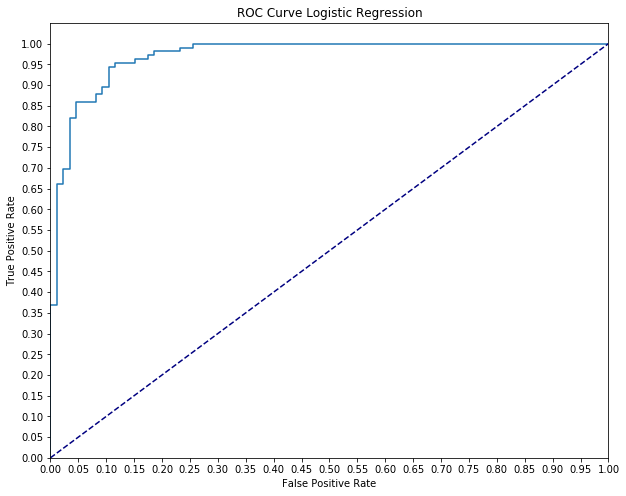

In [89]:
## calculate ROC curve and AUC

y_score = logistic_gridsearch.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print(f'AUC: {auc(fpr, tpr)}')

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.show()

In [90]:
optimal_logreg = LogisticRegression(fit_intercept=False,
                                    solver='liblinear',
                                    C=1,
                                    penalty='l1',
                                    random_state=27)

optimal_logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=27, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
## getting feature importances for logistic regression

selector = RFE(optimal_logreg, n_features_to_select=1)
selector = selector.fit(X_train, y_train)

order = selector.ranking_

feature_ranks = []
for i in order:
    feature_ranks.append(f'{i}. {all_games_df.columns[i]}')

feature_ranks

['6. V_Gross Yards Passing',
 '32. Outcome',
 '30. H_Third Down Pct',
 '2. V_Net Yards Rushing',
 '24. H_Sacked',
 '28. H_Fumbles Lost',
 '26. H_Average Gain',
 '12. V_Fumbles Lost',
 '11. V_Interceptions',
 '5. V_Net Yards Passing',
 '31. H_Fourth Down Pct',
 '7. V_Avg. Yds/Att Passing',
 '13. V_Penalty Avg. Yds Lost',
 '20. H_Avg. Yds/Rush',
 '16. H_First downs',
 '17. H_Total Net Yards',
 '10. V_Average Gain',
 '29. H_Penalty Avg. Yds Lost',
 '27. H_Interceptions',
 '1. V_Total Net Yards',
 '22. H_Gross Yards Passing',
 '25. H_Total Plays',
 '4. V_Avg. Yds/Rush',
 '19. H_Rushing Plays',
 '21. H_Net Yards Passing',
 '3. V_Rushing Plays',
 '15. V_Fourth Down Pct',
 '9. V_Total Plays',
 '8. V_Sacked',
 '23. H_Avg. Yds/Att Passing',
 '14. V_Third Down Pct',
 '18. H_Net Yards Rushing']

Most important features for logistic regression are visitor total net yards, visitor net yards rushing, and visitor rushing plays.

We'll take a look at some graphs showing how the most important features affect outcome.

In [187]:
df = all_games_df.melt(id_vars=['Outcome'], value_vars=['V_Total Net Yards', 'H_Total Net Yards'], value_name='vals', var_name='home')

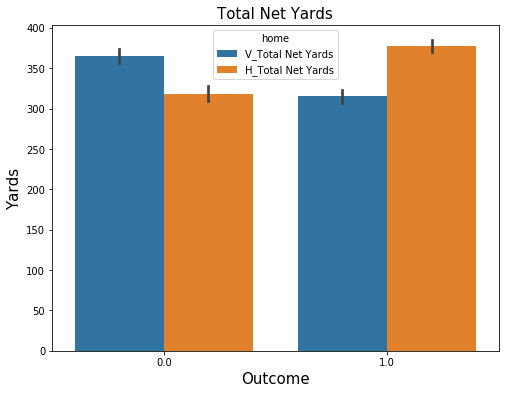

In [191]:
## Creating graphs showing how most important features affect outcome

plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='vals', hue='home', data=df)
plt.title('Total Net Yards', fontsize=15)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Yards', fontsize=15)
plt.show()

Teams that win a game will average total net yards greater than 350 while the teams that lose will average less than 350 total net yards. 

In [192]:
df = all_games_df.melt(id_vars=['Outcome'], value_vars=['V_Net Yards Rushing', 'H_Net Yards Rushing'], value_name='vals', var_name='home')

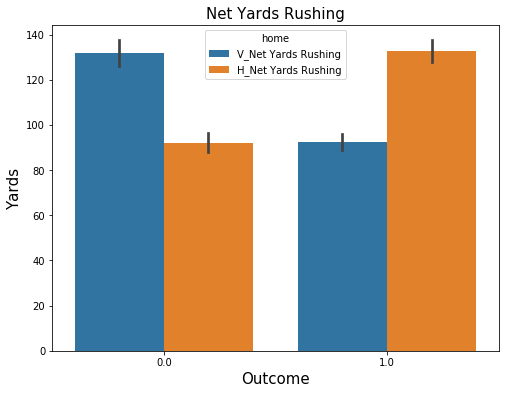

In [194]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='vals', hue='home', data=df)
plt.title('Net Yards Rushing', fontsize=15)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Yards', fontsize=15)
plt.show()

In [196]:
df = all_games_df.melt(id_vars=['Outcome'], value_vars=['V_Rushing Plays', 'H_Rushing Plays'], value_name='vals', var_name='home')

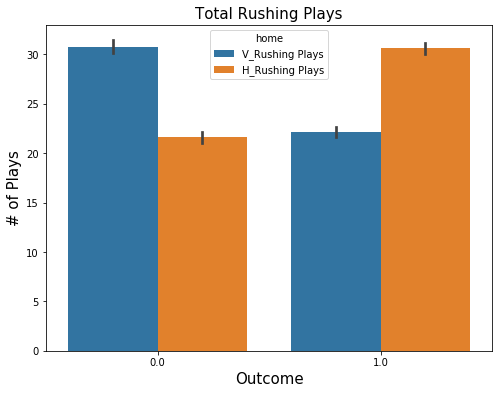

In [198]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='vals', hue='home', data=df)
plt.title('Total Rushing Plays', fontsize=15)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('# of Plays', fontsize=15)
plt.show()

For all these graphs, it is normal that the home team will have higher values for home wins and the visitor will have higher values for home losses. However, it is surprising that the values seem to almost exactly mirror each other because the home team does win more than visitors do. I would have expected the home wins column to have a bigger discrepancy in averages than home losses.

Teams that win will average 120+ rushing yards and 30 rushing plays while teams that lose average less than 100 rushing yards and 21-22 rushing plays. Teams that are winning may be more likely to run the ball to run out the clock which would account for the discrepancy in the amount of rushing plays the winning team has over the losing team.

Next we'll take a look at a support vector machine model.

# Support Vector Machine

In [26]:
svm_clf = SVC(random_state=27)

svm_grid = [{'kernel': ['rbf', 'linear'],
            'C': [.1, 1, 50, 2000],
            'gamma': [1, 0.1, 0.01, 0.001]}]

svm_gridsearch = GridSearchCV(estimator=svm_clf, 
                             param_grid=svm_grid,
                             scoring='accuracy',
                             cv=5)

In [27]:
svm_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=27,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf', 'linear'], 'C': [0.1, 1, 50, 2000], 'gamma': [1, 0.1, 0.01, 0.001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [28]:
## calculate evaluation metrics for model: precision, recall, accuracy, f1

y_hat_train = svm_gridsearch.predict(X_train)
y_hat_test = svm_gridsearch.predict(X_test)

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.9216300940438872
Testing Precision:  0.908256880733945

Training Recall:  0.9074074074074074
Testing Recall:  0.9339622641509434

Training Accuracy:  0.9040139616055847
Testing Accuracy:  0.9114583333333334

Training F1-Score:  0.9144634525660964
Testing F1-Score:  0.9209302325581395


SVM model performs better than logistic regression with an accuracy score of 91%. The other evaluation metrics are also slightly higher than logistic regression with an F1 score of 92%.

In [29]:
svm_gridsearch.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [30]:
optimal_svm = SVC(C=1, gamma=1, kernel='linear', random_state=27)
optimal_svm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=27, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
pred = optimal_svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 76  10]
 [  6 100]]
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        86
         1.0       0.91      0.94      0.93       106

   micro avg       0.92      0.92      0.92       192
   macro avg       0.92      0.91      0.92       192
weighted avg       0.92      0.92      0.92       192



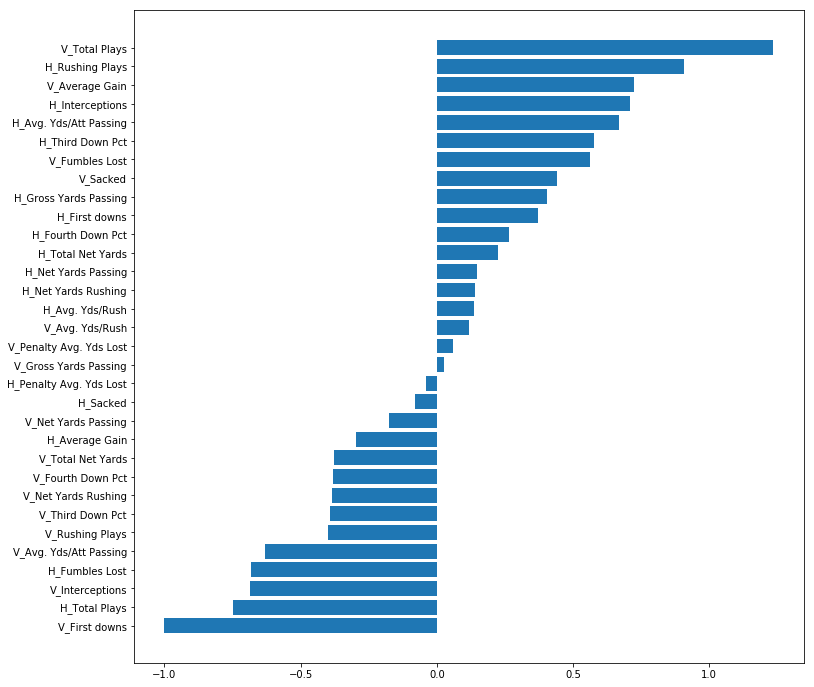

In [153]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(12, 12))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(X.columns)
f_importances(optimal_svm.coef_[0], features_names)

Most important features for svm model are visitor total plays and visitor first downs.

In [175]:
df = all_games_df.melt(id_vars=['Outcome'], value_vars=['V_Total Plays', 'H_Total Plays'], value_name='vals', var_name='home')

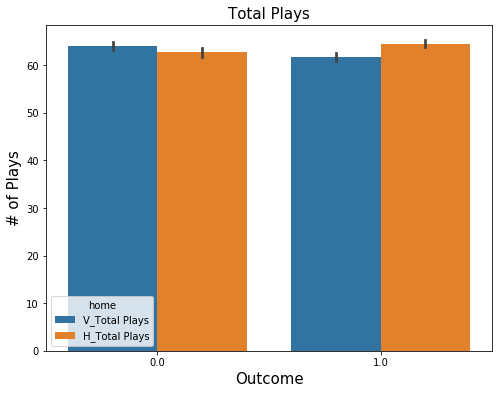

In [176]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='vals', hue='home', data=df)
plt.title('Total Plays', fontsize=15)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('# of Plays', fontsize=15)
plt.show()

Total number of plays are very similar for both visitor and home teams around low 60s, with the winning team having a slightly greater number of plays than the losing team. The winning team is most likely the team that is able to capitalize on the opportunities that are presented for each play.

In [177]:
df = all_games_df.melt(id_vars=['Outcome'], value_vars=['V_First downs', 'H_First downs'], value_name='vals', var_name='home')

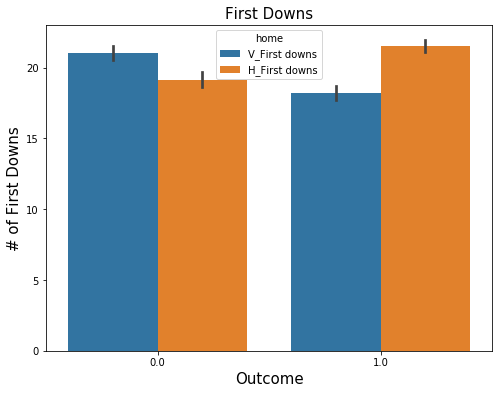

In [178]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='vals', hue='home', data=df)
plt.title('First Downs', fontsize=15)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('# of First Downs', fontsize=15)
plt.show()

This is the first graph where the home wins and loss averages do not seem to exactly mirror each other. The home team seems to get more first downs in their wins than visitors do in their wins. The winning team seems to have 20+ first downs while the losing tema will have less than 20 first downs for the game.

Next we'll take a look a the random forest model.

# Random Forest

In [91]:
rf_clf = RandomForestClassifier(random_state=27)

rf_grid = [{'criterion': ['gini', 'entropy'],
            'n_estimators': [10, 30, 100],
            'max_depth': [None, 2, 5, 9, 15],
            'max_features': [None, 'auto'],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 4, 9]}]

rf_gridsearch = GridSearchCV(estimator=rf_clf, 
                             param_grid=rf_grid,
                             scoring='accuracy',
                             cv=5)

In [92]:
rf_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=27, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini', 'entropy'], 'n_estimators': [10, 30, 100], 'max_depth': [None, 2, 5, 9, 15], 'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 4, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [93]:
rf_gridsearch.score(X_test, y_test)

0.828125

In [94]:
## calculate evaluation metrics for model: precision, recall, accuracy, f1

y_hat_train = rf_gridsearch.predict(X_train)
y_hat_test = rf_gridsearch.predict(X_test)

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.9228486646884273
Testing Precision:  0.8613861386138614

Training Recall:  0.9598765432098766
Testing Recall:  0.8207547169811321

Training Accuracy:  0.9319371727748691
Testing Accuracy:  0.828125

Training F1-Score:  0.940998487140696
Testing F1-Score:  0.8405797101449276


The random forest model also performs extremely well with an accuracy score of 85% but does not perform as well as the logistic regression or SVM models. The model also seems to be slightly overfitting to the training data. Evaluation metrics are also very high for this model with every metric scoring above 85%.

In [95]:
## define a function to plot imporant features

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), all_games_df.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [98]:
rf_gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [99]:
## create a RandomForest Classifier with optimal values to plot important features

optimal_rf = RandomForestClassifier(criterion='gini', 
                                    max_depth=5, 
                                    max_features='auto', 
                                    min_samples_leaf=4,
                                    min_samples_split=2,
                                    n_estimators=100,
                                    random_state=27)

optimal_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=27, verbose=0, warm_start=False)

In [100]:
pred = optimal_rf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[73 13]
 [19 87]]
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82        86
         1.0       0.87      0.82      0.84       106

   micro avg       0.83      0.83      0.83       192
   macro avg       0.83      0.83      0.83       192
weighted avg       0.84      0.83      0.83       192



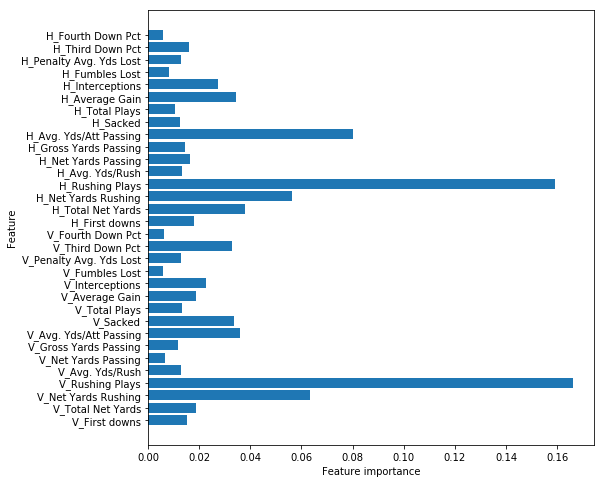

In [81]:
plot_feature_importances(optimal_rf)

The most important features in this model are visitor rushing plays and home rushing plays. Those two features are weighted much more heavily than other features in this model.

Because I've already graphed the most important features for the random forest model above, let's move on to the XGBoost model.

# XGBoost

In [41]:
xgboost = xgb.XGBClassifier(random_state=27)

xg_grid = [{'learning_rate': [0.01, 0.1],
            'max_depth': [3, 6, 9],
            'min_child_weight': [5, 10, 20],
            'subsample': [0.3, 0.7],
            'n_estimators': [5, 30, 100, 250]}]

xg_gridsearch = GridSearchCV(estimator=xgboost, 
                             param_grid=xg_grid,
                             scoring='accuracy',
                             cv=5)

In [42]:
xg_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'learning_rate': [0.01, 0.1], 'max_depth': [3, 6, 9], 'min_child_weight': [5, 10, 20], 'subsample': [0.3, 0.7], 'n_estimators': [5, 30, 100, 250]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
xg_gridsearch.score(X_test, y_test)

0.8697916666666666

In [44]:
## calculate evaluation metrics for model: precision, recall, accuracy, f1

y_hat_train = xg_gridsearch.predict(X_train)
y_hat_test = xg_gridsearch.predict(X_test)

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.9569230769230769
Testing Precision:  0.8857142857142857

Training Recall:  0.9598765432098766
Testing Recall:  0.8773584905660378

Training Accuracy:  0.9528795811518325
Testing Accuracy:  0.8697916666666666

Training F1-Score:  0.958397534668721
Testing F1-Score:  0.8815165876777252


The xgboost model also performs extremely well with an accuracy score of 88%. This model also seems to be slightly overfitting to the training data. This model performs better than random forest with evaluation metrics all above 88%, however, it does not perform better than the logistic regression or SVM models.

In [45]:
xg_gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 10,
 'n_estimators': 250,
 'subsample': 0.7}

In [46]:
optimal_xgb = xgb.XGBClassifier(learning_rate=0.1, 
                                max_depth=6, 
                                min_child_weight=10,
                                n_estimators=250,
                                subsample=0.7,
                                random_state=27)

optimal_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=10, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

In [47]:
pred = optimal_xgb.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[74 12]
 [13 93]]
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86        86
         1.0       0.89      0.88      0.88       106

   micro avg       0.87      0.87      0.87       192
   macro avg       0.87      0.87      0.87       192
weighted avg       0.87      0.87      0.87       192



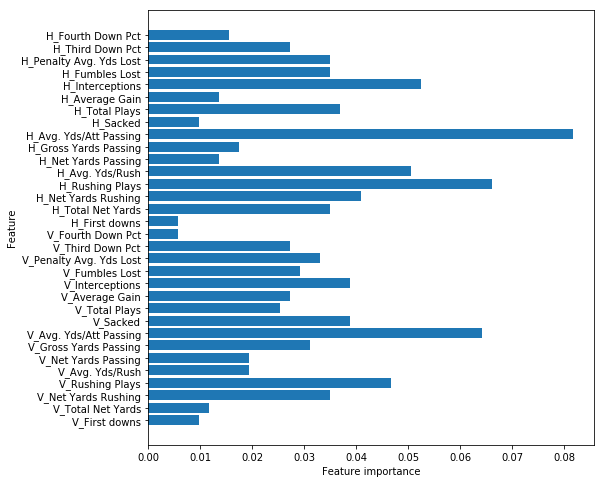

In [48]:
plot_feature_importances(optimal_xgb)

The feature importances for xgboost are spread out much more evenly than the random forest model. Xgboost doesn't have any features that are weighted much more heavily than the others.

In [179]:
df = all_games_df.melt(id_vars=['Outcome'], value_vars=['V_Avg. Yds/Att Passing', 'H_Avg. Yds/Att Passing'], value_name='vals', var_name='home')

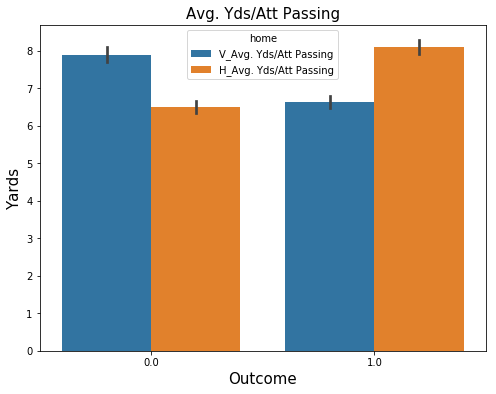

In [181]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='vals', hue='home', data=df)
plt.title('Avg. Yds/Att Passing', fontsize=15)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Yards', fontsize=15)
plt.show()

The winning team will have around ~8 yards per passing attempt while the losing team will have ~6.5 yards per passing attempt. The winning team will be able to generate more yards per play than the losing team.

In [182]:
df = all_games_df.melt(id_vars=['Outcome'], value_vars=['V_Interceptions', 'H_Interceptions'], value_name='vals', var_name='home')

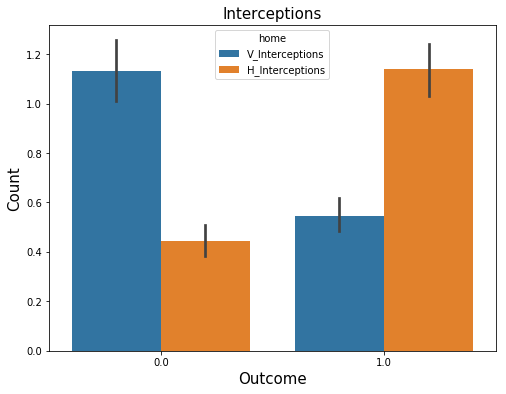

In [183]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='vals', hue='home', data=df)
plt.title('Interceptions', fontsize=15)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

The winning team will average around 1 interception a game while the losing team may or may not get an interception. The winning team will create more turnovers than the losing team.

# Creating Functions for Predicting Future Games

While the models perform extremely well with data from games that have already been played, I want to see if it's possible to predict the outcome of future games. To do this, I'll be using the averages of the past 3 games played by each team to predict the outcome of their next game. 

This is only possible starting from week 4, week 1 is unable to be predicted, week 2 can only use the game data from week 1, and week 3 can only use the averages of the first 2 weeks. I did initially add week 2 and week 3 while gathering prediction data, however, the models performances increased slighty by starting from week 4. Because of this, the prediction data will only have data starting from week 4.

In [49]:
## creating a function to get the averages of the past 3 games for both teams and combining them into one row
## to use in predicting the outcome of the game

def data_for_prediction(visitor_team, home_team, week, year): 
    if week <= 3 or week > 17:
        return('Please choose week greater than 3 and less than 17')
    
    if year == 2017:
        visitor = visitor_team[:16]
        home = home_team[:16]
    elif year == 2018:
        visitor = visitor_team[16:32]
        home = home_team[16:32]
    elif year == 2019:
        visitor = visitor_team[32:]
        home = home_team[32:]

    visitor_columns = []
    home_columns = []
    
    for column in visitor.columns[:-3]:
        visitor_columns.append('V_' + column)
        home_columns.append('H_' + column)
    
    v_index = visitor[visitor['Week'] == week].index[0]
    h_index = home[home['Week'] == week].index[0]
        
    ## weeks 2 and 3 are unneeded after finding out models perform best when starting from week 4
    if week == 2:
        visitor = visitor.iloc[:1, :16]
        home = home.iloc[:1, :16]
    elif week == 3:
        visitor = visitor.iloc[:2, :16]
        home = home.iloc[:2, :16]
    ## this is needed because there was a game postponed week 1 of 2017 so two teams did not have 3 weeks of previous data
    elif week == 4 and (home.iloc[0]['Week'] == 2):
        visitor = visitor_team.iloc[v_index-3:v_index, :16]
        home = home_team.iloc[h_index-2:h_index, :16]        
    else:
        visitor = visitor_team.iloc[v_index-3:v_index, :16]
        home = home_team.iloc[h_index-3:h_index, :16]
        
    game_data = list(visitor.mean()) + list(home.mean())
    predict_df = pd.DataFrame([game_data], columns = visitor_columns + home_columns)
    predict_df['Actual_Outcome'] = home_team.iloc[h_index]['Outcome']
    
    return predict_df

In [50]:
## checking to see if the function works

data_for_prediction(Chicago, Green_Bay, 4, 2017)

,V_First downs,V_Total Net Yards,V_Net Yards Rushing,V_Rushing Plays,V_Avg. Yds/Rush,V_Net Yards Passing,V_Gross Yards Passing,V_Avg. Yds/Att Passing,V_Sacked,V_Total Plays,...,H_Avg. Yds/Att Passing,H_Sacked,H_Total Plays,H_Average Gain,H_Interceptions,H_Fumbles Lost,H_Penalty Avg. Yds Lost,H_Third Down Pct,H_Fourth Down Pct,Actual_Outcome
0,19.0,305.666667,122.333333,24.333333,4.533333,183.333333,205.0,5.533333,2.333333,62.333333,...,7.266667,4.333333,69.0,5.233333,0.0,0.333333,8.0,0.476667,0.333333,1.0


The function to get average data from teams is working properly.

Now I'm going to be gathering data from all the games once again but this time I'll be making the dataframe with values that I'll be using to predict future games (the averages of the past 3 games played).

In [51]:
## getting html data and slicing it so it starts from week 4

year_2017 = pd.read_html('https://www.footballdb.com/games/index.html?lg=NFL&yr=2017')[3:17]
year_2018 = pd.read_html('https://www.footballdb.com/games/index.html?lg=NFL&yr=2018')[3:17]
year_2019 = pd.read_html('https://www.footballdb.com/games/index.html?lg=NFL&yr=2019')[3:17]

In [52]:
## checking data to see if its possible to loop through html page data to find which teams are playing againt each other

year_2017[0]

,Date,Visitor,Unnamed: 2,Home,Unnamed: 4,Unnamed: 5,Box
0,09/28/201709/28,Chicago BearsCHI,14,Green Bay PackersGB,35,NaN,BoxscoreBox
1,10/01/201710/01,New Orleans SaintsNO,20,Miami DolphinsMIA,0,NaN,BoxscoreBox
2,10/01/201710/01,Buffalo BillsBUF,23,Atlanta FalconsATL,17,NaN,BoxscoreBox
3,10/01/201710/01,Pittsburgh SteelersPIT,26,Baltimore RavensBAL,9,NaN,BoxscoreBox
4,10/01/201710/01,Carolina PanthersCAR,33,New England PatriotsNE,30,NaN,BoxscoreBox
5,10/01/201710/01,Cincinnati BengalsCIN,31,Cleveland BrownsCLE,7,NaN,BoxscoreBox
6,10/01/201710/01,Los Angeles RamsLA,35,Dallas CowboysDAL,30,NaN,BoxscoreBox
7,10/01/201710/01,Detroit LionsDET,14,Minnesota VikingsMIN,7,NaN,BoxscoreBox
8,10/01/201710/01,Tennessee TitansTEN,14,Houston TexansHOU,57,NaN,BoxscoreBox
9,10/01/201710/01,Jacksonville JaguarsJAX,20,New York JetsNYJ,23,OT,BoxscoreBox


In [53]:
year_2017[0]['Visitor']

0            Chicago BearsCHI
1        New Orleans SaintsNO
2            Buffalo BillsBUF
3      Pittsburgh SteelersPIT
4        Carolina PanthersCAR
5       Cincinnati BengalsCIN
6          Los Angeles RamsLA
7            Detroit LionsDET
8         Tennessee TitansTEN
9     Jacksonville JaguarsJAX
10      San Francisco 49ersSF
11     Philadelphia EaglesPHI
12         New York GiantsNYG
13         Oakland RaidersOAK
14      Indianapolis ColtsIND
15     Washington RedskinsWAS
Name: Visitor, dtype: object

In [54]:
## code to get prediction data for all 3 years

prediction_data = pd.DataFrame()
years = [year_2017, year_2018, year_2019]
year_count = [2017, 2018, 2019]

for x in range(3):
    week_count = 4
    for week in years[x]:
        for num in range(len(week)):
            if week['Visitor'][num] == 'Houston TexansHOU':
                visitor_df = Houston
            elif week['Visitor'][num] == 'Arizona CardinalsARI':
                visitor_df = Arizona
            elif week['Visitor'][num] == 'Cleveland BrownsCLE':
                visitor_df = Cleveland
            elif week['Visitor'][num] == 'Buffalo BillsBUF':
                visitor_df = Buffalo
            elif week['Visitor'][num] == 'Chicago BearsCHI':
                visitor_df = Chicago
            elif week['Visitor'][num] == 'Tennessee TitansTEN':
                visitor_df = Tennessee
            elif week['Visitor'][num] == 'Philadelphia EaglesPHI':
                visitor_df = Philadelphia
            elif week['Visitor'][num] == 'Minnesota VikingsMIN':
                visitor_df = Minnesota
            elif week['Visitor'][num] == 'New England PatriotsNE':
                visitor_df = New_England
            elif week['Visitor'][num] == 'Miami DolphinsMIA':
                visitor_df = Miami
            elif week['Visitor'][num] == 'New York JetsNYJ':
                visitor_df = NY_Jets
            elif week['Visitor'][num] == 'Dallas CowboysDAL':
                visitor_df = Dallas
            elif week['Visitor'][num] == 'Washington RedskinsWAS':
                visitor_df = Washington
            elif week['Visitor'][num] == 'San Francisco 49ersSF':
                visitor_df = San_Francisco
            elif week['Visitor'][num] == 'Green Bay PackersGB':
                visitor_df = Green_Bay
            elif week['Visitor'][num] == 'Detroit LionsDET':
                visitor_df = Detroit
            elif week['Visitor'][num] == 'Cincinnati BengalsCIN':
                visitor_df = Cincinnati
            elif week['Visitor'][num] == 'Indianapolis ColtsIND':
                visitor_df = Indianapolis
            elif week['Visitor'][num] == 'Baltimore RavensBAL':
                visitor_df = Baltimore
            elif week['Visitor'][num] == 'Carolina PanthersCAR':
                visitor_df = Carolina
            elif week['Visitor'][num] == 'Tampa Bay BuccaneersTB':
                visitor_df = Tampa_Bay
            elif week['Visitor'][num] == 'Jacksonville JaguarsJAX':
                visitor_df = Jacksonville
            elif week['Visitor'][num] == 'Kansas City ChiefsKC':
                visitor_df = Kansas_City
            elif week['Visitor'][num] == 'Pittsburgh SteelersPIT':
                visitor_df = Pittsburgh
            elif week['Visitor'][num] == 'New Orleans SaintsNO':
                visitor_df = New_Orleans
            elif week['Visitor'][num] == 'Los Angeles ChargersLAC':
                visitor_df = LA_Chargers
            elif week['Visitor'][num] == 'Oakland RaidersOAK':
                visitor_df = Oakland
            elif week['Visitor'][num] == 'Denver BroncosDEN':
                visitor_df = Denver
            elif week['Visitor'][num] == 'Los Angeles RamsLA':
                visitor_df = LA_Rams
            elif week['Visitor'][num] == 'Seattle SeahawksSEA':
                visitor_df = Seattle
            elif week['Visitor'][num] == 'Atlanta FalconsATL':
                visitor_df = Atlanta
            elif week['Visitor'][num] == 'New York GiantsNYG':
                visitor_df = NY_Giants

            if week['Home'][num] == 'Houston TexansHOU':
                home_df = Houston
            elif week['Home'][num] == 'Arizona CardinalsARI':
                home_df = Arizona
            elif week['Home'][num] == 'Cleveland BrownsCLE':
                home_df = Cleveland
            elif week['Home'][num] == 'Buffalo BillsBUF':
                home_df = Buffalo
            elif week['Home'][num] == 'Chicago BearsCHI':
                home_df = Chicago
            elif week['Home'][num] == 'Tennessee TitansTEN':
                home_df = Tennessee
            elif week['Home'][num] == 'Philadelphia EaglesPHI':
                home_df = Philadelphia
            elif week['Home'][num] == 'Minnesota VikingsMIN':
                home_df = Minnesota
            elif week['Home'][num] == 'New England PatriotsNE':
                home_df = New_England
            elif week['Home'][num] == 'Miami DolphinsMIA':
                home_df = Miami
            elif week['Home'][num] == 'New York JetsNYJ':
                home_df = NY_Jets
            elif week['Home'][num] == 'Dallas CowboysDAL':
                home_df = Dallas
            elif week['Home'][num] == 'Washington RedskinsWAS':
                home_df = Washington
            elif week['Home'][num] == 'San Francisco 49ersSF':
                home_df = San_Francisco
            elif week['Home'][num] == 'Green Bay PackersGB':
                home_df = Green_Bay
            elif week['Home'][num] == 'Detroit LionsDET':
                home_df = Detroit
            elif week['Home'][num] == 'Cincinnati BengalsCIN':
                home_df = Cincinnati
            elif week['Home'][num] == 'Indianapolis ColtsIND':
                home_df = Indianapolis
            elif week['Home'][num] == 'Baltimore RavensBAL':
                home_df = Baltimore
            elif week['Home'][num] == 'Carolina PanthersCAR':
                home_df = Carolina
            elif week['Home'][num] == 'Tampa Bay BuccaneersTB':
                home_df = Tampa_Bay
            elif week['Home'][num] == 'Jacksonville JaguarsJAX':
                home_df = Jacksonville
            elif week['Home'][num] == 'Kansas City ChiefsKC':
                home_df = Kansas_City
            elif week['Home'][num] == 'Pittsburgh SteelersPIT':
                home_df = Pittsburgh
            elif week['Home'][num] == 'New Orleans SaintsNO':
                home_df = New_Orleans
            elif week['Home'][num] == 'Los Angeles ChargersLAC':
                home_df = LA_Chargers
            elif week['Home'][num] == 'Oakland RaidersOAK':
                home_df = Oakland
            elif week['Home'][num] == 'Denver BroncosDEN':
                home_df = Denver
            elif week['Home'][num] == 'Los Angeles RamsLA':
                home_df = LA_Rams
            elif week['Home'][num] == 'Seattle SeahawksSEA':
                home_df = Seattle
            elif week['Home'][num] == 'Atlanta FalconsATL':
                home_df = Atlanta
            elif week['Home'][num] == 'New York GiantsNYG':
                home_df = NY_Giants

            prediction_data = prediction_data.append(data_for_prediction(visitor_df, home_df, week_count, year_count[x]), ignore_index=True)

        week_count += 1

In [55]:
## removing draws

prediction_data = prediction_data[prediction_data['Actual_Outcome'] != 0.5]

In [56]:
## separating target variable from data

X_pred_data = prediction_data.drop(labels=['Actual_Outcome'], axis=1)
y_pred_data = prediction_data['Actual_Outcome']

In [57]:
## scaling prediction data

scaled_pred_data = ss.transform(X_pred_data)

# Logistic Regression

In [219]:
pred = optimal_logreg.predict(scaled_pred_data)
print(confusion_matrix(y_pred_data, pred))
print(classification_report(y_pred_data, pred))

[[180  94]
 [173 178]]
              precision    recall  f1-score   support

         0.0       0.51      0.66      0.57       274
         1.0       0.65      0.51      0.57       351

   micro avg       0.57      0.57      0.57       625
   macro avg       0.58      0.58      0.57       625
weighted avg       0.59      0.57      0.57       625



In [59]:
accuracy_score(y_pred_data, pred)

0.5728

[[180  94]
 [173 178]]


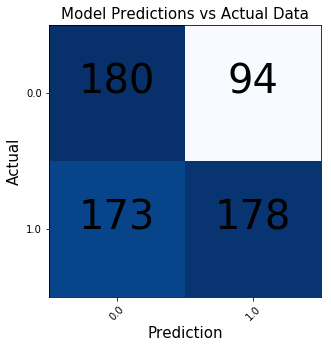

In [220]:
## easier to read confusion matrix for presentation
plt.figure(figsize=(5, 5))
cnf_matrix = confusion_matrix(y_pred_data, pred)

print(cnf_matrix)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues)

plt.title('Model Predictions vs Actual Data', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Prediction', fontsize=15)

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cnf_matrix.max()/2.

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment='center',
             color='black' if cnf_matrix[i, j] > thresh else 'black',
             fontsize=40)

plt.show()

The models performance decreases significantly when using the prediction data. Accuracy for logistic regression falls to 57% and the other evaluation metrics all fall to around 50-60%. 

Lets see if the other models perform better on prediction data.

# SVM

In [209]:
pred = optimal_svm.predict(scaled_pred_data)
print(confusion_matrix(y_pred_data, pred))
print(classification_report(y_pred_data, pred))

[[164 110]
 [140 211]]
              precision    recall  f1-score   support

         0.0       0.54      0.60      0.57       274
         1.0       0.66      0.60      0.63       351

   micro avg       0.60      0.60      0.60       625
   macro avg       0.60      0.60      0.60       625
weighted avg       0.61      0.60      0.60       625



In [61]:
accuracy_score(y_pred_data, pred)

0.6

[[164 110]
 [140 211]]


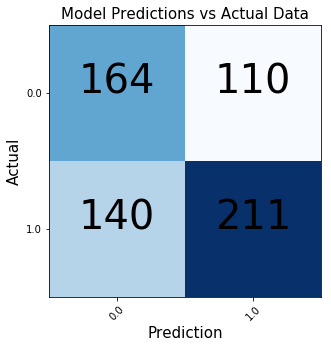

In [212]:
## easier to read confusion matrix for presentation
plt.figure(figsize=(5, 5))
cnf_matrix = confusion_matrix(y_pred_data, pred)

print(cnf_matrix)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues)

plt.title('Model Predictions vs Actual Data', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Prediction', fontsize=15)

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cnf_matrix.max()/2.

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment='center',
             color='black' if cnf_matrix[i, j] > thresh else 'black',
             fontsize=40)

plt.show()

Just like logistic regression, SVM accuracy dropped significantly to 60%. The SVM model also performs better than logistic regression on prediction data. Other evaluation metrics also dropped with an F1 score of 63%. 

# Random Forest

In [217]:
pred = optimal_rf.predict(scaled_pred_data)
print(confusion_matrix(y_pred_data, pred))
print(classification_report(y_pred_data, pred))

[[144 130]
 [132 219]]
              precision    recall  f1-score   support

         0.0       0.52      0.53      0.52       274
         1.0       0.63      0.62      0.63       351

   micro avg       0.58      0.58      0.58       625
   macro avg       0.57      0.57      0.57       625
weighted avg       0.58      0.58      0.58       625



In [102]:
accuracy_score(y_pred_data, pred)

0.5808

[[144 130]
 [132 219]]


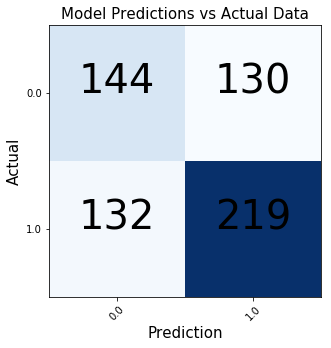

In [218]:
## easier to read confusion matrix for presentation
plt.figure(figsize=(5, 5))
cnf_matrix = confusion_matrix(y_pred_data, pred)

print(cnf_matrix)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues)

plt.title('Model Predictions vs Actual Data', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Prediction', fontsize=15)

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cnf_matrix.max()/2.

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment='center',
             color='black' if cnf_matrix[i, j] > thresh else 'black',
             fontsize=40)

plt.show()

Unlike with actual game data, random forest performs slightly better than logistic regression with prediction data with an accuracy score of 58%, but still performs worse than SVM. The other evaluation metrics are also higher than logistic regression at ~63% and F1 score is equal to SVM model.

# XGBoost

In [215]:
pred = optimal_xgb.predict(scaled_pred_data)
print(confusion_matrix(y_pred_data, pred))
print(classification_report(y_pred_data, pred))

[[160 114]
 [134 217]]
              precision    recall  f1-score   support

         0.0       0.54      0.58      0.56       274
         1.0       0.66      0.62      0.64       351

   micro avg       0.60      0.60      0.60       625
   macro avg       0.60      0.60      0.60       625
weighted avg       0.61      0.60      0.60       625



In [65]:
accuracy_score(y_pred_data, pred)

0.6032

[[160 114]
 [134 217]]


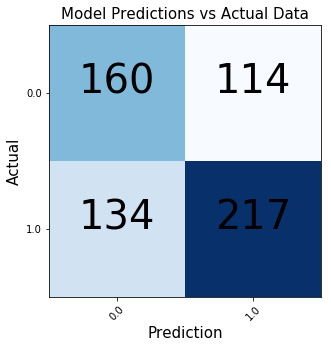

In [216]:
## easier to read confusion matrix for presentation
plt.figure(figsize=(5, 5))
cnf_matrix = confusion_matrix(y_pred_data, pred)

print(cnf_matrix)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues)

plt.title('Model Predictions vs Actual Data', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Prediction', fontsize=15)

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cnf_matrix.max()/2.

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment='center',
             color='black' if cnf_matrix[i, j] > thresh else 'black',
             fontsize=40)

plt.show()

Xgboost performs the best on prediction data, slightly beating out SVM with an accuracy score of 60.3%. The performance metrics of are also the highest with this model with an f1 score of 64%.

# Conclusion

While the outcome of games that have already been played can be predicted at a very high percentage (above 85%), the same cannot be said for predicting the outcome of future games. In order to predict the outcome of future games, I used the averages of the previous 3 weeks for each team and ran that data through various models to determine which model performed the best with the data. The XGBoost model performed the best of the models I tested and I am able to predict the outcome of an NFL game with an accuracy of 60%. 